# Setup

In [5]:
from __future__ import print_function
import time
import tomopy
import dxchange
import h5py
import numpy as np
import numexpr as ne
import skimage.transform as st
import os
import sys
import scipy.ndimage.filters as snf
import concurrent.futures as cf
from tomopy.util import mproc
import warnings
import importlib
import matplotlib.pyplot as plt

from reconstruction import recon
from reconstruction import recon_setup
from reconstruction import convert8bit
from reconstruction import sino_360_to_180
from reconstruction import remove_outlier1d
from reconstruction import convertthetype
from reconstruction import read_als_832h5_tomo_only
from reconstruction import read_als_832h5_non_tomo
from reconstruction import read_sls

from ipypathchooser import PathChooser
from ipysliceviewer import SliceViewer
from itkwidgets import view

# Set input/output paths and filename

In [7]:
#p = PathChooser(default_directory="/global/cfs/cdirs/als/users/parkinson")
#p

In [8]:
#inputPath = p.chosen_path

In [13]:
#if you don't want to use the path chooser, just set the variables
filename = 'FiberForm_13A_air_200torr_05.h5'
outputPath = '/global/cfs/cdirs/als/users/parkinson/SLS_Feb2019/reconstructions/nerscrecons/'
inputPath = '/global/cfs/cdirs/als/users/parkinson/SLS_Feb2019/disk1/FiberForm_13A_air_200torr_05/'

# Set parameters (see reconstruction.py for defaults)

In [28]:
#apart from filename/path, no variables are needed
#variables can optionally be added to over-ride default parameters

functioninput = {
    "filename": filename,
    "inputPath": inputPath,
    "outputPath": outputPath,
    "filetype": 'sls',
    "sinoused": (-1,1,1), #uncommenting this allows you to reconstruct just 5 slices instead of 2016
    "timepoint": 10, #timepoints range from 0 to 179
    "cor": 995.625, #uncomment this if you don't want to automatically detect center of rotation
}

# create parameter dictionary to submit reconstruction
recon_dictionary = recon_setup(**functioninput)

cleaning up previous temp files, reading metadata
There are 2016 sinograms, 2016rays, and 1000 projections
using user input center of 995.625


# run the reconstruction

In [29]:
# note that if there are multiple chunks,
#ONLY the last chunk is returned in the variable rec,
#the remainder are written to file

rec = recon(**recon_dictionary)

Start FiberForm_13A_air_200torr_05.h5 at:Thu, 11 Jun 2020 15:04:29 +0000
/global/cfs/cdirs/als/users/parkinson/SLS_Feb2019/reconstructions/nerscrecons/recFiberForm_13A_air_200torr_05/FiberForm_13A_air_200torr_05
cleaning up previous temp files
sino chunk 1 of 1
normalize (took 0.02 seconds)
minus_log (took 0.02 seconds)
remove_stripe_fw (took 0.89 seconds)
recon_mask Reconstructing 1 slice groups with 1 master threads...
(took 0.84 seconds)
write_output (took 0.25 seconds)
cleaning up temp files
End Time: Thu, 11 Jun 2020 15:04:36 +0000
It took 7.543 s to process /global/cfs/cdirs/als/users/parkinson/SLS_Feb2019/disk1/FiberForm_13A_air_200torr_05/FiberForm_13A_air_200torr_05.h5


# Visualize the results

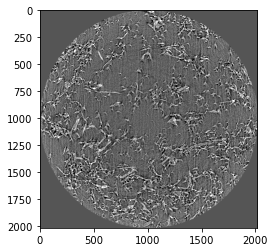

In [26]:
# plt.imshow(tomo[:,10,:],cmap='gray',vmin=.5,vmax=1.25)
plt.imshow(rec[0,:,:],cmap='gray',vmin=-1,vmax=2)

In [11]:
#view(rec)

In [30]:
s = SliceViewer(volume=rec)
s

SliceViewer(children=(PathChooser(current_directory='/global/u2/d/dula', selected_item='', show_hidden='False'…